In [1]:
from IPython.display import display, Image
import os, warnings
import re
warnings.filterwarnings(action='ignore')
from selenium import webdriver
from bs4 import BeautifulSoup
import time
from selenium.webdriver import ActionChains
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 시각화 (Exploratory data analysis)
* seaborn 라이브러리를 활용하여 컬럼별 데이터 간의 상관관계 파악
* 데이터의 분포 및 특성 확인

In [2]:
final_df = pd.read_excel("./preprocessed_df.xlsx")
final_df

,total_patients,total_death,total_recovered,critical_rate,recovery_rate,patient_per_million,total_population,country_name,country_iso_code,continent_name
0,34434803,617875,28817134,0.018,0.837,104032,331002651,미국,US,North America
1,30028709,390691,28994855,0.013,0.966,21760,1380004385,인도,IN,Asia
2,18056639,504897,16388847,0.028,0.908,84949,212559417,브라질,BR,South America
3,5760002,110829,5575086,0.019,0.968,88244,65273511,프랑스,FR,Europe
4,5381736,49293,5242945,0.009,0.974,63811,84339067,터키,TR,Europe
...,...,...,...,...,...,...,...,...,...,...
220,4,0,4,0.000,1.000,68,59190,마셜 제도,MH,Oceania
221,4,1,3,0.250,0.750,13,307145,바누아투,VU,Oceania
222,3,0,3,0.000,1.000,15,198414,사모아,WS,Oceania
223,2,0,2,0.000,1.000,329,6077,세인트헬레나,SH,Africa


In [3]:
final_df.shape # 데이터 개수 파악

(225, 10)

In [11]:
# 인구수 100만명당 환자수 기준으로 상위 10개 국가

final_df.sort_values(by="patient_per_million", ascending=False)[:15]

,total_patients,total_death,total_recovered,critical_rate,recovery_rate,patient_per_million,total_population,country_name,country_iso_code,continent_name
148,13864,127,13665,0.009,0.986,179434,77265,안도라,AD,Europe
100,100104,1606,98202,0.016,0.981,159385,628066,몬테네그로,ME,Europe
20,1666325,30289,1633550,0.018,0.980,155601,10708981,체코,CZ,Europe
70,263689,1326,256063,0.005,0.971,154968,1701575,바레인,BH,Asia
175,5090,90,5000,0.018,0.982,150010,33931,산마리노,SM,Europe
145,14620,59,13323,0.004,0.911,148657,98347,세이셸,SC,Africa
111,72294,207,67507,0.003,0.934,133743,540544,몰디브,MV,Asia
178,4323,94,4214,0.022,0.975,128313,33691,지브롤터,GI,Europe
72,257116,4417,251496,0.017,0.978,123677,2078938,슬로베니아,SI,Europe
112,70547,818,69461,0.012,0.985,112699,625978,룩셈부르크,LU,Europe


In [12]:
# 절대 환자수 기준으로 상위 10개 국가

final_df.sort_values(by="total_patients", ascending=False)[:15]

,total_patients,total_death,total_recovered,critical_rate,recovery_rate,patient_per_million,total_population,country_name,country_iso_code,continent_name
0,34434803,617875,28817134,0.018,0.837,104032,331002651,미국,US,North America
1,30028709,390691,28994855,0.013,0.966,21760,1380004385,인도,IN,Asia
2,18056639,504897,16388847,0.028,0.908,84949,212559417,브라질,BR,South America
3,5760002,110829,5575086,0.019,0.968,88244,65273511,프랑스,FR,Europe
4,5381736,49293,5242945,0.009,0.974,63811,84339067,터키,TR,Europe
5,5381736,49293,5242945,0.009,0.974,63811,84339067,터키,TR,Asia
6,5368513,130895,4902110,0.024,0.913,36787,145934462,러시아,RU,Europe
7,5368513,130895,4902110,0.024,0.913,36787,145934462,러시아,RU,Asia
8,4651988,128008,4306482,0.028,0.926,68526,67886011,영국,GB,Europe
9,4298782,90281,3928389,0.021,0.914,95115,45195774,아르헨티나,AR,South America


In [14]:
# 회복률 높은 순으로 정렬

final_df.sort_values(by="recovery_rate", ascending=False)[:15]

,total_patients,total_death,total_recovered,critical_rate,recovery_rate,patient_per_million,total_population,country_name,country_iso_code,continent_name
224,1,0,1,0.000,1.000,9,115023,미크로네시아,NaN,Africa
223,2,0,2,0.000,1.000,329,6077,세인트헬레나,SH,Africa
222,3,0,3,0.000,1.000,15,198414,사모아,WS,Oceania
220,4,0,4,0.000,1.000,68,59190,마셜 제도,MH,Oceania
217,20,0,20,0.000,1.000,29,686884,솔로몬 제도,SB,Oceania
214,27,0,27,0.000,1.000,33708,801,바티칸 시국,VA,Europe
211,63,0,63,0.000,1.000,18103,3480,포클랜드 제도,FK,South America
210,109,0,109,0.000,1.000,7265,15003,앵귈라,AI,North America
114,62470,35,62098,0.001,0.994,10678,5850342,싱가포르,SG,Asia
208,161,1,160,0.006,0.994,1431,112523,그레나다,GD,North America


In [9]:
# 사망률 높은 순으로 정렬

final_df.sort_values(by="critical_rate", ascending=False)[:15]

,total_patients,total_death,total_recovered,critical_rate,recovery_rate,patient_per_million,country_name,country_iso_code,continent_name
220,4,1,3,0.250,0.750,13,바누아투,VU,Oceania
168,6892,1355,3980,0.197,0.577,231,예멘,YE,Asia
218,10,1,8,0.100,0.800,17,서사하라,EH,Africa
16,2482784,231505,1977071,0.093,0.796,19256,멕시코,MX,North America
123,36522,2748,30370,0.075,0.832,833,수단,SD,Africa
132,25205,1851,21756,0.073,0.863,1440,시리아,SY,Asia
67,278295,15935,206852,0.057,0.743,2719,이집트,EG,Africa
144,14868,775,7216,0.052,0.485,935,소말리아,SO,Africa
103,91653,4636,86503,0.051,0.944,64,중국,NaN,Africa
216,20,1,19,0.050,0.950,4006,몬트세랫,MS,North America


['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
[6617936, 59216053, 51396308, 40374776, 24005, 29847453]


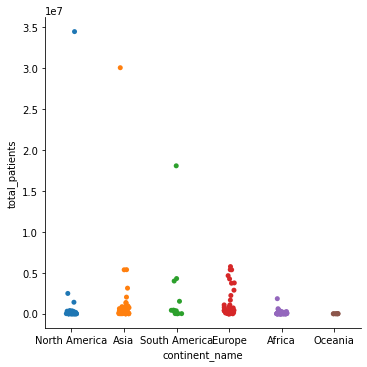

In [25]:
# 대륙별 확진자 수 비교 그래프 (절대 환자 수)

continent_group = final_df.groupby('continent_name')['total_patients'].sum()
continent_category = continent_group.index.tolist()
continent_data = continent_group.tolist()

print(continent_category)
print(continent_data)


sns.catplot(x="continent_name", y="total_patients", data=final_df)
plt.show()

대륙별 총 확진자 수 

Africa
총 확진자 수: 1258166 

Asia
총 확진자 수: 1474487 

Europe
총 확진자 수: 3533507 

North America
총 확진자 수: 928121 

Oceania
총 확진자 수: 70792 

South America
총 확진자 수: 736881 



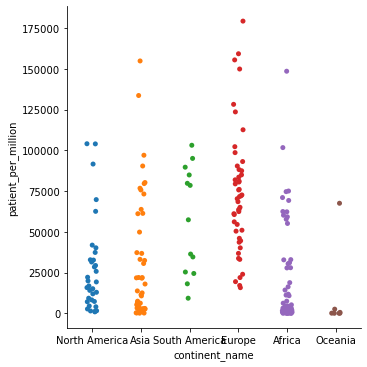

In [23]:
# 대륙별 확진자 수 비교 그래프 (100만명 당 환자수 기준)

continent_group = final_df.groupby('continent_name')['patient_per_million'].sum()
continent_category = continent_group.index.tolist()
continent_data = continent_group.tolist()

print("대륙별 총 확진자 수 인구 100만명당 환자수 기준", '\n')
for continent, data in zip(continent_category, continent_data):
    print("{}".format(continent))
    print("총 확진자 수: {}".format(data), '\n')

sns.catplot(x="continent_name", y="patient_per_million", data=final_df)
plt.show()

In [26]:
# 국가별 순위 정보를 시각화하기

country_with_rank = final_df[["country_name", "total_patients"]]
country_with_rank = country_with_rank.sort_values(by=["total_patients"], ascending=False)[:20]
country_with_rank = country_with_rank.set_index("country_name")

<AxesSubplot:ylabel='country_name'>

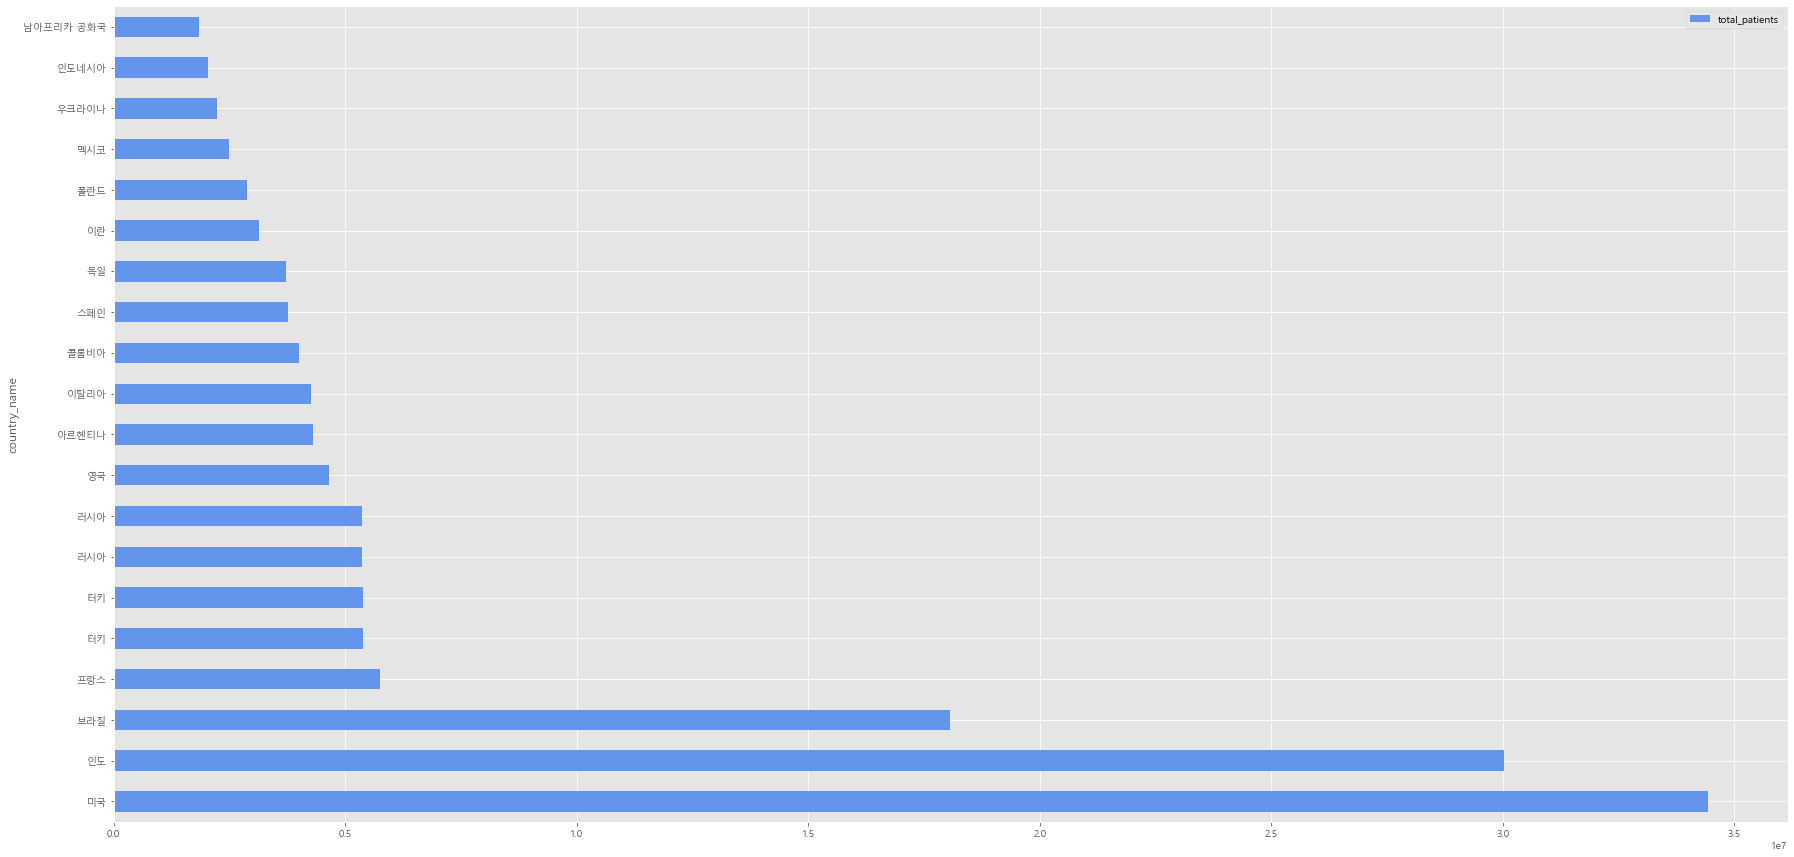

In [33]:
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/MALGUN.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
rc('xtick', labelsize=10)

plt.style.use('ggplot')
country_with_rank.plot(kind='barh', color='cornflowerblue', width=0.5, figsize=(30, 15))

### 가설
* 각 대륙마다 회복률 편차가 있을 것.
* 다른 대륙과 비교해서 인구 수에 비해 확진자 수가 높았던 유럽 및 남아메리카 회복률이 더 낮을 것이라고 생각

### 결과: 회복률은 크게 편차가 없음

['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
[0.8517272727272727, 0.9059565217391305, 0.9477291666666664, 0.8049411764705882, 0.8564285714285714, 0.86]


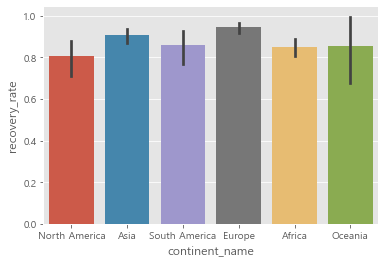

In [34]:
### 대륙별 회복률 파악

continent_group = final_df.groupby("continent_name")["recovery_rate"].mean()
continent_category = continent_group.index.tolist()
continent_data = continent_group.tolist()

print(continent_category)
print(continent_data)

sns.barplot(x="continent_name", y="recovery_rate", data=final_df)
plt.show()

### 가설
* 확진자 수가 많은 미국 및 인도를 고려하면 아시아와 북미가 높을것으로 예상

### 결과: 북미가 월등히 높게 나옴

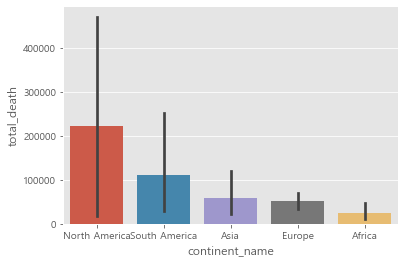

In [35]:
### 사망률 Top 50는 어느 대륙에 가장 많을까?

processed = pd.read_excel("./preprocessed_df.xlsx")
top50 = processed.sort_values(by="total_death", ascending=False)[:50]


sns.barplot(x="continent_name", y="total_death", data=top50)
plt.show()

Text(0.5, 1.0, 'Top 10 countries with the patient per million')

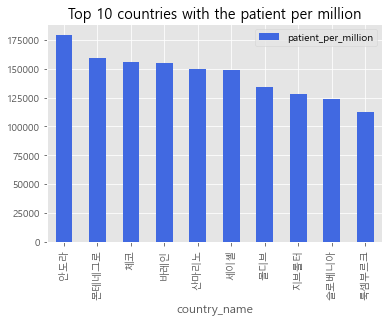

In [36]:
# 인구수 100만명당 환자수 기준 상위 10개 국가 그래프

final_df.sort_values(by="patient_per_million", ascending=False)[:10].plot.bar(x="country_name", y="patient_per_million", color="royalblue")
plt.title('Top 10 countries with the patient per million')

### 인사이트

* 100만명당 환자수(발생률=확진자/인구수*1,000,000)는 인구에서 확진자가 차지하는 비중에 백만을 곱한 것으로 절대 환자수 기준과는 상이할 수 있다.
* 발생률 상위 10개 국가의 인구는 체코를 제외하면 1천만명 미만으로 주로 유럽 지역의 소규모 국가들이 포진해 있는 것을 알 수 있다. 
* 절대 환자수가 다른 국가에 비해 적어도 총 인구가 적은 만큼 확진자가 증가할수록 발생률이 급격히 커지게 된다.

Text(0.5, 1.0, 'Top 10 countries with the total patients')

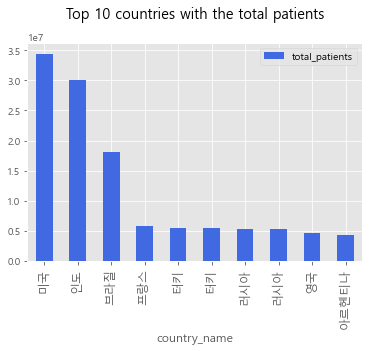

In [37]:
# 절대 환자 수 기준 상위 10개 국가 그래프

rc('xtick', labelsize=12)
final_df.sort_values(by="total_patients", ascending=False)[:10].plot.bar(x="country_name", y="total_patients", color="royalblue")
plt.title('Top 10 countries with the total patients', pad=25)

### 인사이트

* 확진자 수가 많았던 북미, 유럽 국가들이 상위에 있을 것으로 예상했으며 예상대로 상위권에 있었음
* 회복률을 내림차순으로 50개까지 정렬해봤는데 0.97~1.0 범위에 있었음

Text(0.5, 1.0, 'Top 15 countries with critical rate')

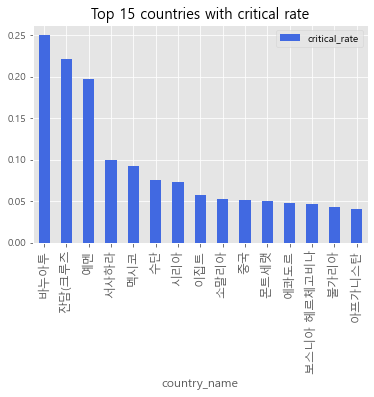

In [38]:
# 치명률 높은 순서 그래프

rc('xtick', labelsize=12)
final_df.sort_values(by="critical_rate", ascending=False)[:15].plot.bar(x="country_name", y="critical_rate", color="royalblue")
plt.title('Top 15 countries with critical rate')

### 인사이트

* 치명률(%) = (누적 사망자 수/ 누적 확진자 수) *100 확진자 수와 사망자 수 자체가 적은 국가의 경우 해석에 주의할 필요가 있다. 

* 바누아투, 서사하라, 몬트세랫을 제외하면 인구 규모가 1천만명 이상인 국가들로 해당 국가에서 치명률에 영향을 미치는 요인이 무엇인지 다각도로 검토할 필요가 있다. (연령, 의료진, 병상 규모, 방역 수칙 준수, 백신 접종 등)

### 웹크롤링 - 데이터 전처리 - 시각화 프로젝트를 진행하면서 느낀점
* 한 개의 웹사이트에서 크롤링한 데이터만으로 의미있는 분석 결과를 내는 것에는 "한계"가 존재함
* "전처리 단계에서 결측값 및 작은 수치의 Feature를 어떻게 처리하는지"가 분석에 영향을 미칠 수 있음 (중요함)
* 데이터 시각화의 중요성을 확인할 수 있었음 -> 그래프로 표현하면 직관적으로 파악 및 추가적인 질문들이 떠오름